<a href="https://colab.research.google.com/github/Roushan74/Health_Risk_Classification_202401100300204/blob/main/Roushan_kumar_202401100300204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         bmi  exercise_hours  junk_food_freq risk_level
0  28.730279              13               1       high
1  31.301442              12               4     medium
2  32.549043               9               0     medium
3  30.463670               2               1     medium
4  28.431755               2               1        low
Classification Report:
               precision    recall  f1-score   support

        high       0.20      0.20      0.20         5
         low       0.14      0.20      0.17         5
      medium       0.62      0.50      0.56        10

    accuracy                           0.35        20
   macro avg       0.32      0.30      0.31        20
weighted avg       0.40      0.35      0.37        20

Confusion Matrix:
 [[1 3 1]
 [2 1 2]
 [2 3 5]]


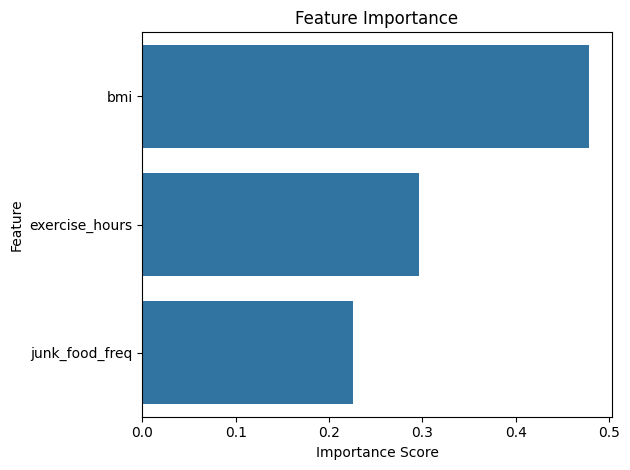

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from CSV file
df = pd.read_csv('/content/health_risk.csv')

# Display the first few rows to understand the structure (optional)
print(df.head())

# Encode the categorical target column 'risk_level' to numeric values
# e.g., 'low' → 1, 'medium' → 2, 'high' → 0 (based on internal ordering)
le = LabelEncoder()
df['risk_level_encoded'] = le.fit_transform(df['risk_level'])

# Separate the features (independent variables) and target (dependent variable)
X = df[['bmi', 'exercise_hours', 'junk_food_freq']]  # Features
y = df['risk_level_encoded']                          # Target

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with 100 decision trees
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Print a classification report to evaluate precision, recall, F1-score
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Print the confusion matrix to see how well the model predicted each class
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the importance of each feature used in the model
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
